In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Introducing the stars
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__, keras.__version__)
print(tf.config.list_physical_devices())

2.4.1 2.4.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


# Artificial Neural Networks

We will explore some basic usages of the `keras` package to build and train ANNs.

There are a few different ways in which `keras` can build ANN models. In particular, we will see the Sequential and Functional APIs. For feed-forward fully-connected networks, the Sequential API is probably the more straightforward.

## Neural Netwoks as good approximators

We will build a model to perform the simple task of approximating a 1-D real function.

### Using the Sequential API

In [3]:
keras.backend.clear_session()

In [4]:
# Instatiate model
model = keras.models.Sequential()

# Use add method to add an input layer (which is also a keras class)
model.add(keras.layers.InputLayer(input_shape=(1,)))

# Add two fully-connected (a.k.a. Dense) hidden layers
# you can change the activation funtion
model.add(keras.layers.Dense(5, activation='tanh', name='Oculta1'))
model.add(keras.layers.Dense(4, activation='tanh'))

# Add the output layer. As this is a regression problem, choose linear activation
model.add(keras.layers.Dense(1, activation='linear'))

Now use `summary` method to see a description of what we just built

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Oculta1 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense (Dense)                (None, 4)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


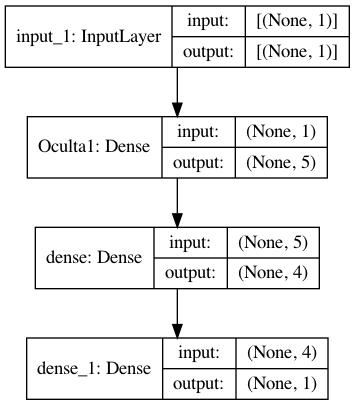

In [6]:
keras.utils.plot_model(model, show_shapes=True)

### Compilation

For the model to run, we must first compile it.

At this point, **two crucial pieces of information** have to be provided:
1. The error function (a.k.a. loss function)
2. The optimizer function.

In [7]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(learning_rate=0.1))

### Data preparation

Let us put our model at test with a simple function.

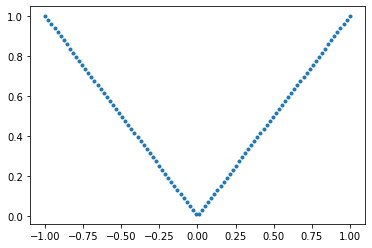

In [8]:
x = np.linspace(-1, 1, 100)

# Modulo
t = np.abs(x)

# Heavyside
# t = np.where(x > 0, 1, 0)

plt.plot(x, t, '.')

### Training

We are now ready to fit the model.

In its simplest form, the `fit` method takes the input vector `x` (here 1-d) and the label `t` (here 1-d). It also needs a number of `epochs` or steps to perform in the direction of the gradient. 

**N.B.** In fact, this is the number of times the gradient is evaluated using all data points, but the Stochastic Gradient Descent actually updates the parameter vector for each data batch. Its size can also be provided as an argument to the `fit` method.

In [9]:
model.fit?

Signature:
model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose=1,
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
Docstring:
Trains the model for a fixed number of epochs (iterations on a dataset).

Arguments:
    x: Input data. It could be:
      - A Numpy array (or array-like), or a list of arrays
        (in case the model has multiple inputs).
      - A TensorFlow tensor, or a list of tensors
        (in case the model has multiple inputs).
      - A dict mapping input names to the corresponding array/tensors,
        if the model has named inputs.
      - A `tf.data` dataset. Should return a tuple
        of either `(inputs, targets)` or
        `(inputs, targets, sam

In [10]:
print(x.shape, t.shape)

(100,) (100,)


In [11]:
history = model.fit(x, t, batch_size=int(len(x)/4), epochs=200)

Epoch 1/200
4/4 [==============================] - 0s 976us/step - loss: 0.4152
Epoch 2/200
4/4 [==============================] - 0s 868us/step - loss: 0.1105
Epoch 3/200
4/4 [==============================] - 0s 995us/step - loss: 0.0945
Epoch 4/200
4/4 [==============================] - 0s 845us/step - loss: 0.0928
Epoch 5/200
4/4 [==============================] - 0s 850us/step - loss: 0.0982
Epoch 6/200
4/4 [==============================] - 0s 859us/step - loss: 0.0826
Epoch 7/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0852
Epoch 8/200
4/4 [==============================] - 0s 917us/step - loss: 0.0907
Epoch 9/200
4/4 [==============================] - 0s 816us/step - loss: 0.0926
Epoch 10/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0845
Epoch 11/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0849
Epoch 12/200
4/4 [==============================] - 0s 899us/step - loss: 0.0845
Epoch 13/200
4/4 [=========================

### Prediction

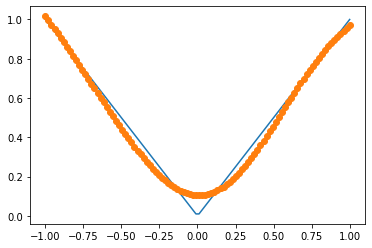

In [12]:
y = model.predict(x)
plt.plot(x, t)
plt.plot(x, y, 'o')

In [13]:
model.evaluate(x, t)

4/4 [==============================] - 0s 1ms/step - loss: 0.0016


0.0015609784750267863

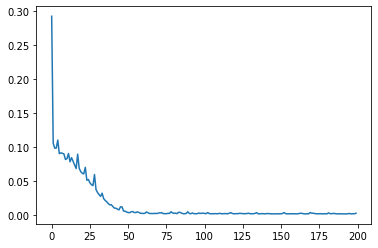

In [14]:
plt.plot(history.history['loss'])

### Under the hood

In this simple network, we can see how things work. Let us get the weights for each layer.

In [15]:
model.layers

In [16]:
w1, w0 = model.layers[0].get_weights()
w2, z0 = model.layers[1].get_weights()
w3, z1 = model.layers[2].get_weights()

The weights are matrices whose size is related to the size of the layer and the number of units it connects.
The second argument is an array with the weights.

In [17]:
print(w2.shape, z0.shape)
# print(w2, z0)

(5, 4) (4,)


With all this information, we can compute the outcome of the first layer, for each point in the dataset.

In [18]:
def acti(x):
    return np.tanh(x)

In [19]:
zz = []
for i in range(len(w1[0])):
  zz.append(acti(w1[0][i] * x + w0[i]))
  
    # xx = w1[0][i] * x + w0[i]
  # yy.append(np.where(xx > 0, xx, 0))

zz = np.array(zz).T
print(zz.shape)

(100, 5)


In [20]:
# Compute outcome of second layer
yy = acti(np.dot(zz, w2) + z0)

In [21]:
yy.shape

(100, 4)

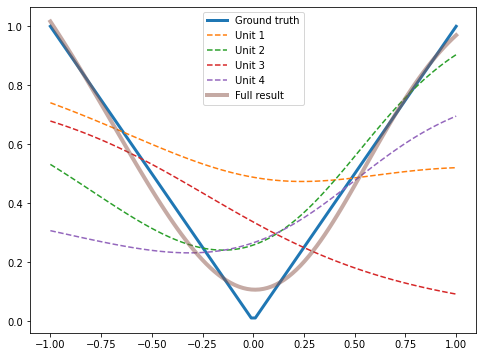

In [22]:
# The final outcome is the combination of each of this four functions, with a weight...
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.plot(x, t, lw=3, label='Ground truth')
for i, yi in enumerate(yy.T):
  ax.plot(x, yi * w3[i] + z1, '--', label='Unit {}'.format(i+1))

ax.plot(x, np.dot(yy, w3) + z1, label='Full result', lw=4, alpha=0.5)
ax.legend(loc=0)

## ANNs take on MNIST

We are going to reuse the MNIST dataset of handwritten numbers and train a simple neural network to classify them.

The goal is then to try to understand how the network works, so we are going to choose a relatively simple architecture.

### Preparing the data

In [23]:
(X_train, t_train), (X_val, t_val) = keras.datasets.mnist.load_data()

The labels in `t_train` and `t_val` are numbers between 0 and 9.

The first thing we do is convert the class labels to 1-of-K encoding. For that we use the function `keras.utils.to_categorical` (similar to `sklearn`'s `OneHotEncoder`)

In [24]:
t_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [25]:
from keras.utils import to_categorical
t_train_ohe = keras.utils.to_categorical(t_train)
t_val_ohe = keras.utils.to_categorical(t_val)
print(t_train_ohe[:3], t_train[:3])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] [5 0 4]


Next, we normalise the images. We bring the pixel scale, originally between 0 and 255 to the interval [0, 1).

In [26]:
print(X_train.min(), X_train.max())
print(X_val.min(), X_val.max())

X_train = X_train/255.0
X_val = X_val/255.0

print(X_train.min(), X_train.max())
print(X_val.min(), X_val.max())

0 255
0 255
0.0 1.0
0.0 1.0


There is not much more to do in terms of data preparation, because `keras` already splits the set in train and validation sets.

Let us simply visualize some individuals.

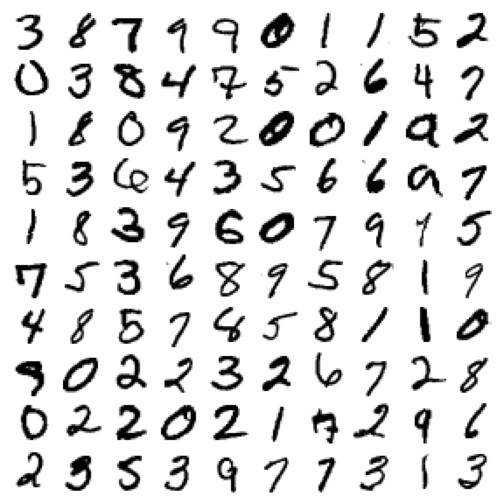

In [27]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap ='binary', **options)
    plt.axis("off")
    
plt.figure(figsize=(9,9))
plot_digits(X_train[10000:10100], images_per_row=10)

### Model definition.

How do we start?

Let's take some ideas from the source of all knowledge: YouTube

In [28]:
from IPython.display import YouTubeVideo

YouTubeVideo('aircAruvnKk?start=332', width=560, height=200)

Good. Let's implement a similar network, but much larger!

In [29]:
X_train.shape

(60000, 28, 28)

In [67]:
def define_model():
    
    model = keras.models.Sequential()

    # Input layer
    model.add(keras.layers.Flatten(input_shape=(28,28)))

    # Two hidden layers with 32 units each
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dense(32, activation='relu'))

    # Output layer. As this is a multi-class classification problem, use K (here 10) units.
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    return model

model = define_model()

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


### Compilation

Next comes compilation. 

Because we are using 1-of-K encoding, we need to use `categorical_crossentropy` as loss function. If using digits as labels, the adequate function is `sparse_categorical_crossentropy`.

We also tell the model to monitor the Accuracy (but we could provide other metrics here, such as the recall of fives... `keras.metrics.Recall()`

In [32]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.Recall(class_id=5)])

***
**Small game**: Can you compute the number of parameters in this model?

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


### Training

Training can be tricky, even for a small network such as this. 

We now fit the model, but notice the following changes:

1. The output of the method is stored in a variable `history` that contains the evolution of the traning process.
2. We add the argument `validation_data` to define what dataset to use for validation.

In [36]:
history = model.fit(epochs=200, batch_size=32, x=X_train, y=t_train_ohe, validation_data=(X_val, t_val_ohe), )
#                     callbacks=[early,])

Epoch 1/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5890 - accuracy: 0.8337 - recall: 0.5889 - val_loss: 0.2161 - val_accuracy: 0.9384 - val_recall: 0.8161
Epoch 2/200
1875/1875 [==============================] - 2s 968us/step - loss: 0.1936 - accuracy: 0.9448 - recall: 0.8993 - val_loss: 0.1652 - val_accuracy: 0.9523 - val_recall: 0.9496
Epoch 3/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1453 - accuracy: 0.9579 - recall: 0.9322 - val_loss: 0.1435 - val_accuracy: 0.9559 - val_recall: 0.8890
Epoch 4/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1241 - accuracy: 0.9647 - recall: 0.9416 - val_loss: 0.1403 - val_accuracy: 0.9599 - val_recall: 0.9372
Epoch 5/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1116 - accuracy: 0.9679 - recall: 0.9549 - val_loss: 0.1165 - val_accuracy: 0.9680 - val_recall: 0.9518
Epoch 6/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0960

This is nice, but we would like to see a plot of this. This is what `history` is all about.

In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'recall', 'val_loss', 'val_accuracy', 'val_recall'])

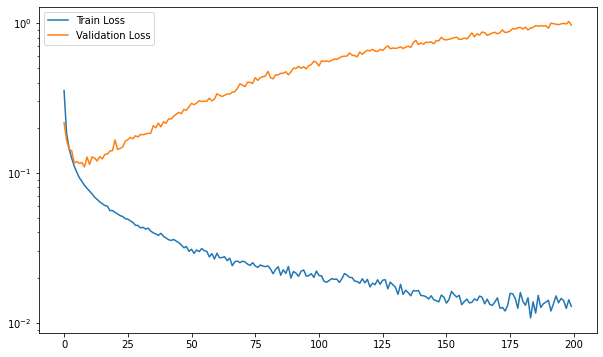

In [39]:
plt.figure(figsize=(10, 6))
plt.semilogy(history.history['loss'], label='Train Loss')
plt.semilogy(history.history['val_loss'], label='Validation Loss')
plt.legend(loc=0)

<AxesSubplot:>

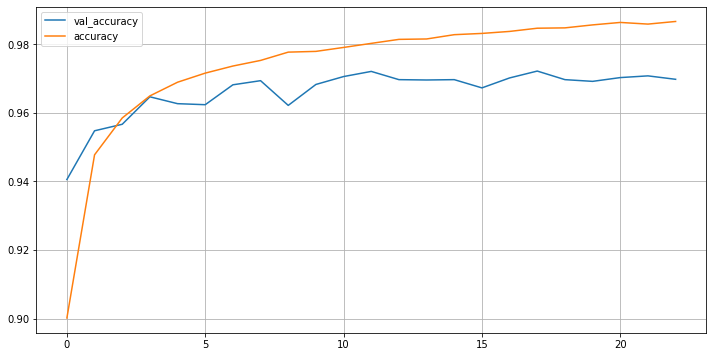

In [74]:
import pandas as pd
k = 'accuracy'
pd.DataFrame.from_dict(history.history).plot(y=['val_'+k, k], grid=True, figsize=(12,6))

#### Avoid overfitting using early stopping

To accelerate the process, and check that the network is not overfitting, we will add an additional step in the fitting process. A _callback_ that can stop the training early if no improvement in the validation loss is seen.

This is implemented in `EarlyStopping`. Let's set it up.

In [ ]:
early = keras.callbacks.EarlyStopping(patience=15, monitor='val_loss',
                                      restore_best_weights=True)

Here, we wait 15 epochs to see an improvement. If none is seen, the fit is returned to the optimal values and the training is stopped. This is _very_ useful.

Let's train the model, but now including a calleback (there could be many more, see `keras.callbacks` and [documentation](https://keras.io/api/callbacks/).

In [70]:
# To start from scratch
keras.backend.clear_session()

model = define_model()
model.compile(loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.Recall(class_id=5)])

In [71]:
history = model.fit(epochs=200, batch_size=32, x=X_train, y=t_train_ohe, validation_data=(X_val, t_val_ohe),
                     callbacks=[early,])

Epoch 1/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5905 - accuracy: 0.8307 - recall: 0.6218 - val_loss: 0.2037 - val_accuracy: 0.9405 - val_recall: 0.8823
Epoch 2/200
1875/1875 [==============================] - 2s 953us/step - loss: 0.1883 - accuracy: 0.9449 - recall: 0.9116 - val_loss: 0.1550 - val_accuracy: 0.9547 - val_recall: 0.8935
Epoch 3/200
1875/1875 [==============================] - 2s 956us/step - loss: 0.1375 - accuracy: 0.9593 - recall: 0.9380 - val_loss: 0.1446 - val_accuracy: 0.9566 - val_recall: 0.9372
Epoch 4/200
1875/1875 [==============================] - 2s 953us/step - loss: 0.1241 - accuracy: 0.9631 - recall: 0.9432 - val_loss: 0.1197 - val_accuracy: 0.9646 - val_recall: 0.9395
Epoch 5/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1037 - accuracy: 0.9695 - recall: 0.9515 - val_loss: 0.1330 - val_accuracy: 0.9626 - val_recall: 0.9518
Epoch 6/200
1875/1875 [==============================] - 2s 995us/step - loss: 

### Analysis

Exploremos ahora un poco más los errores de la red. Para eso, trabajaremos con el conjunto de validación (esto no es del todo correcto porque usé el mismo conjunto para hacer la validación).

In [48]:
model.evaluate(X_val, t_val_ohe)

313/313 [==============================] - 0s 769us/step - loss: 0.9677 - accuracy: 0.9619 - recall: 0.9540


[0.9677181839942932, 0.961899995803833, 0.9540358781814575]

Let us take a closer look at the cases in which the network made mistakes

In [79]:
model.predict(X_val)[8]

array([3.0053127e-10, 9.9931044e-13, 3.1448482e-09, 3.6995218e-08,
       3.7172918e-05, 3.8310182e-01, 6.1685765e-01, 3.4502388e-17,
       2.3931784e-06, 8.3900380e-07], dtype=float32)

In [80]:
# Compute predictions and find instances with error
y_val = np.argmax(model.predict(X_val), axis=1)

# Find errors
ierror = (y_val - t_val != 0)

# How many are there
print('There are {} errors in the validation set'.format(np.sum(ierror)))

There are 307 errors in the validation set


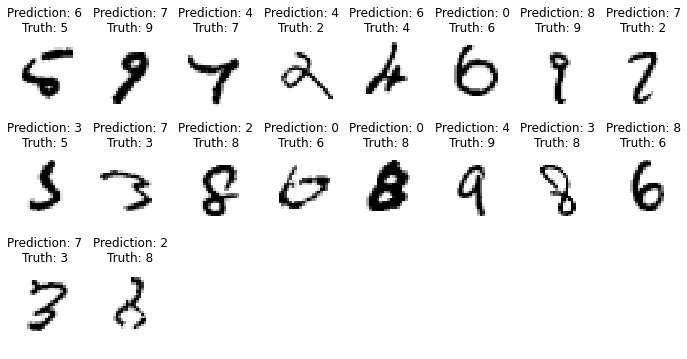

In [81]:
n_images = 18
n_columns = 8

n_rows = np.int(n_images / n_columns)

if n_images % n_columns != 0:
    n_rows += 1

fig, axs = plt.subplots(ncols=n_columns, nrows=n_rows, figsize=(12, 2*n_rows))
# Veamos algunos ejemplos de los datos en los que se equivocó

for i, ax in zip(range(n_images), axs.flatten()):
    ax.imshow(X_val[ierror][i], interpolation='None', cmap='binary')
    ax.set_title('Prediction: {}\nTruth: {}'.format(y_val[ierror][i], t_val[ierror][i]))

for ax in axs.flatten():
    ax.axis('off')

Ok, this seems reasonable, right? I mean, look at those numbers. Some are really tough....

Let's look at the probability distribution. I keep the probability of the class that was chosen by the network, both in the case of errors and those that were not.

In [82]:
pred_proba_all = np.max(model.predict(X_val), axis=1)

pred_proba = np.max(model.predict(X_val[~ierror]), axis=1)
pred_proba_err = np.max(model.predict(X_val[ierror]), axis=1)

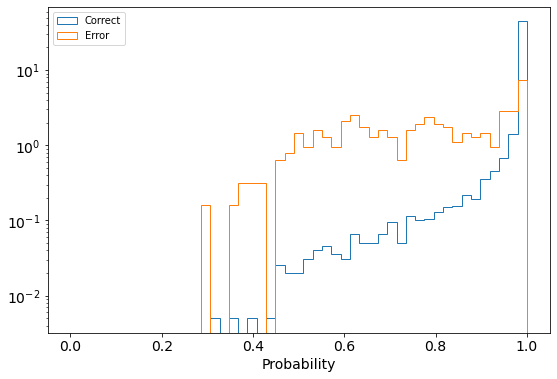

In [92]:
# Veamos la distribución
fig = plt.figure(figsize=(9,6))

bins = np.linspace(0, 1, 50)
plt.hist(pred_proba, bins=bins, histtype='step', label='Correct', density=True, log=True)
plt.hist(pred_proba_err, bins=bins, histtype='step', label='Error', density=True)

# Labels and ticks
plt.xlabel('Probability', size=14)
plt.gca().tick_params(axis='both', which='major', labelsize=14)

plt.legend(loc=2)

This is good. The network seems to be less sure when making mistakes. This means we could tweak the decision threshold a bit to improve the performance.

But it seems to be quite sure of cases in which it makes mistakes. Let's see those.

In [86]:
ii = (pred_proba_all > 0.95) * (y_val - t_val != 0)

print('There are {} images mistakenly classified with over 95% probability'.format(sum(ii)))

There are 72 images mistakenly classified with over 95% probability


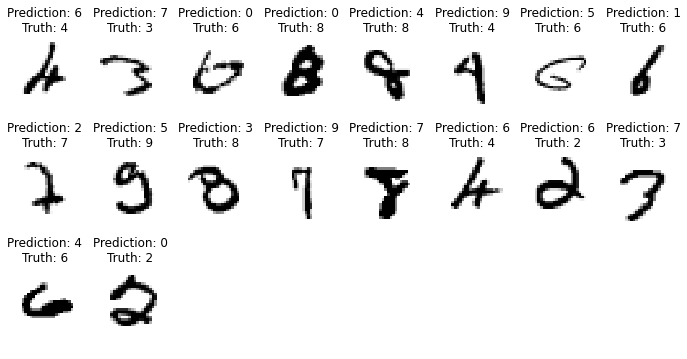

In [87]:
n_images = 18
n_columns = 8

n_rows = np.int(n_images / n_columns)

if n_images % n_columns != 0:
    n_rows += 1

fig, axs = plt.subplots(ncols=n_columns, nrows=n_rows, figsize=(12, 2*n_rows))
# Veamos algunos ejemplos de los datos en los que se equivocó

for i, ax in zip(range(n_images), axs.flatten()):
    ax.imshow(X_val[ii][i], interpolation='None', cmap='binary')
    ax.set_title('Prediction: {}\nTruth: {}'.format(y_val[ii][i], 
                                                    t_val[ii][i]))

for ax in axs.flatten():
    ax.axis('off')

#### How does the network learn.

Let's try to look inside the network to understand if he understood something about what numbers are like or not. There are many parameters, but we are hopeful that at least the first layer is something reasonable, like an edge detector. Let's see.

Let's read the weights and bias of the first hidden layer and see the shapes.

In [88]:
model.layers

In [114]:
# Note here the relevant layer is layer[1], as layer[0] is a flattening layer.
W, b = model.layers[1].get_weights()
print(W.shape, b.shape)

(784, 32) (32,)


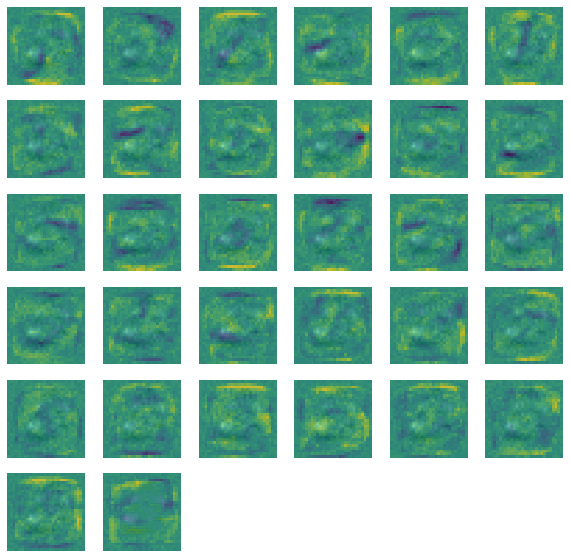

In [128]:
WW = W.reshape([28,28,32])

# Find relavant limits for pixel values
Wmin = WW[3:-3, 3:-3].min()
Wmax = WW[3:-3, 3:-3].max()

fig = plt.figure(figsize=(10,10))
for i in range(WW.shape[-1]):
    ax = fig.add_subplot(6, 6, i+1)

    # Fixed limits in Z axis
    ax.imshow(WW[:, :, i], interpolation='None', vmin=Wmin, vmax=Wmax, alpha=0.7, zorder=2)
    
    ax.imshow(a , cmap='gray_r')
    
    ax.axis('off')

The weights of the first layer do not look at all like border detectors, or anything like that. 

It seems the network finds a much stranger way to generalise than we would do. We will see that CNNs do something much closer to what one would expect.

**Does this make sense?**

* We never provided any idea of neighbourhood between features. How could the network tell?
* How can we generate a neural network that recognizes images in a more similar way to how humans do?

This is the topic of the week after the next...

## Your turn!

* Can you improve the performance of this network without changing the architecture?
    * Try one of the reduction procedures from a few weeks ago (PCA, etc.)
    * Add an additional callback to regulate the learning rate of the SGD algorithm (algorithmic-centric).

### Exploremos un número que ajusto mal 

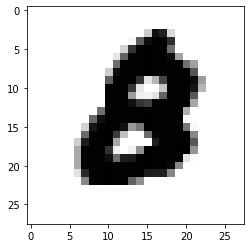

In [129]:
x495 = X_val[495]
plt.imshow(x495, cmap='gray_r')

In [134]:
proba = model.predict(X_val[495].reshape(-1, 28, 28))
print('Predicción: {} con probabilidad {:.2f} %'.format(np.argmax(proba, axis=1), np.max(proba)*100))

Predicción: [0] con probabilidad 99.77 %


Cada neurona ve los píxeles de la imagen, multiplicados por los pesos.
Podemos ver la superposición de la imagen con los pesos y después el producto.

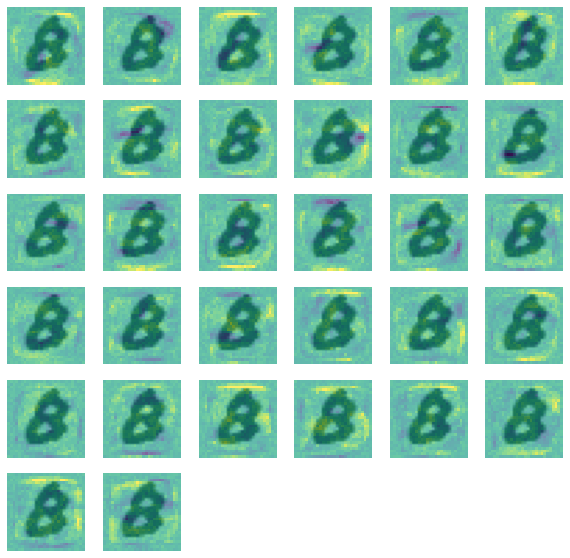

In [135]:
WW = W.reshape([28,28,32])

# Find relavant limits for pixel values
Wmin = WW[3:-3, 3:-3].min()
Wmax = WW[3:-3, 3:-3].max()

fig = plt.figure(figsize=(10,10))
for i in range(WW.shape[-1]):
    ax = fig.add_subplot(6, 6, i+1)

    # Fixed limits in Z axis
    ax.imshow(x495.reshape(28, 28), cmap='gray_r', zorder=1)
    ax.imshow(WW[:, :, i], interpolation='None', vmin=Wmin, vmax=Wmax, alpha=0.7, zorder=2)
    
    ax.axis('off')

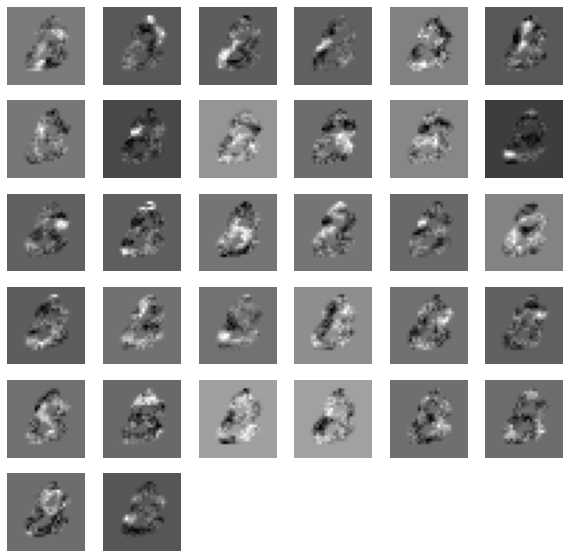

In [139]:
WW = W.reshape([28,28,32])

# Find relavant limits for pixel values
Wmin = WW[3:-3, 3:-3].min()
Wmax = WW[3:-3, 3:-3].max()

fig = plt.figure(figsize=(10,10))
for i in range(WW.shape[-1]):
    ax = fig.add_subplot(6, 6, i+1)
    
    a = (x495 * WW[:, :, i])
    ax.imshow(a , cmap='gray_r')
    
    ax.axis('off')

Cada neurona agarra el resultado de este producto, suma todos los píxeles y el bias, para llegar a la activación.

In [140]:
a = np.dot(x495.reshape(1, -1), W).flatten() + b
print(a)

[ 4.02914451 -5.24375214 -6.53692861 -1.30608348  4.65932679 -4.77150731
  3.55072912 -1.01583332  4.09354251 -1.61794378  4.60043954 -5.68733159
 -0.55737955 -2.4506802  -2.28524606 -0.09882495  2.65755769  1.02128103
 -6.51371594 -5.00819661 -1.89338456  5.17300956  1.73705347  2.15620999
 -3.94146573 -0.78960377  5.20446066 11.85187788  0.94774298  1.13581749
  3.13916796  0.85291412]


In [141]:
# Pero en realidad, falta la activación, que como la elegimos ReLu, se puede escribir
np.where(a>0, a, 0)

array([ 4.02914451,  0.        ,  0.        ,  0.        ,  4.65932679,
        0.        ,  3.55072912,  0.        ,  4.09354251,  0.        ,
        4.60043954,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  2.65755769,  1.02128103,  0.        ,  0.        ,
        0.        ,  5.17300956,  1.73705347,  2.15620999,  0.        ,
        0.        ,  5.20446066, 11.85187788,  0.94774298,  1.13581749,
        3.13916796,  0.85291412])